In [2]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns
sns.set()

In [10]:
# skip lines which cant be parsed
df = pd.read_csv('datasets/essays.csv', encoding='latin1')
df

,#AUTHID,TEXT,cEXT,cNEU,cAGR,cCON,cOPN
0,1997_504851.txt,"Well, right now I just woke up from a mid-day ...",n,y,y,n,y
1,1997_605191.txt,"Well, here we go with the stream of consciousn...",n,n,y,n,n
2,1997_687252.txt,An open keyboard and buttons to push. The thin...,n,y,n,y,y
3,1997_568848.txt,I can't believe it! It's really happening! M...,y,n,y,y,n
4,1997_688160.txt,"Well, here I go with the good old stream of co...",y,n,y,n,y
...,...,...,...,...,...,...,...
2462,2004_493.txt,I'm home. wanted to go to bed but remembe...,n,y,n,y,n
2463,2004_494.txt,Stream of consiousnesssskdj. How do you s...,y,y,n,n,y
2464,2004_497.txt,"It is Wednesday, December 8th and a lot has be...",n,n,y,n,n
2465,2004_498.txt,"Man this week has been hellish. Anyways, now i...",n,y,n,n,y


In [14]:
cat_columns = ['cEXT', 'cNEU', 'cAGR', 'cCON', 'cOPN']
# parse y, n to 1, 0
df[cat_columns] = df[cat_columns].replace({'y': 1, 'n': 0})
df

,#AUTHID,TEXT,cEXT,cNEU,cAGR,cCON,cOPN
0,1997_504851.txt,"Well, right now I just woke up from a mid-day ...",0,1,1,0,1
1,1997_605191.txt,"Well, here we go with the stream of consciousn...",0,0,1,0,0
2,1997_687252.txt,An open keyboard and buttons to push. The thin...,0,1,0,1,1
3,1997_568848.txt,I can't believe it! It's really happening! M...,1,0,1,1,0
4,1997_688160.txt,"Well, here I go with the good old stream of co...",1,0,1,0,1
...,...,...,...,...,...,...,...
2462,2004_493.txt,I'm home. wanted to go to bed but remembe...,0,1,0,1,0
2463,2004_494.txt,Stream of consiousnesssskdj. How do you s...,1,1,0,0,1
2464,2004_497.txt,"It is Wednesday, December 8th and a lot has be...",0,0,1,0,0
2465,2004_498.txt,"Man this week has been hellish. Anyways, now i...",0,1,0,0,1


In [15]:
# get data types for each column
df.dtypes

#AUTHID    object
TEXT       object
cEXT        int64
cNEU        int64
cAGR        int64
cCON        int64
cOPN        int64
dtype: object

In [21]:
# list the unique value coiunts for each column
# number of values for each unique value
for col in cat_columns:
    print(df[col].value_counts())
    print()

1    1276
0    1191
Name: cEXT, dtype: int64

0    1234
1    1233
Name: cNEU, dtype: int64

1    1310
0    1157
Name: cAGR, dtype: int64

1    1253
0    1214
Name: cCON, dtype: int64

1    1271
0    1196
Name: cOPN, dtype: int64



In [24]:
df2 = pd.read_csv('datasets/mbti_1.csv')
df2

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...
...,...,...
8670,ISFP,'https://www.youtube.com/watch?v=t8edHB_h908||...
8671,ENFP,'So...if this thread already exists someplace ...
8672,INTP,'So many questions when i do these things. I ...
8673,INFP,'I am very conflicted right now when it comes ...


In [28]:
# number of unique values for each column
df2['type'].nunique()

16

<Axes: xlabel='type', ylabel='count'>

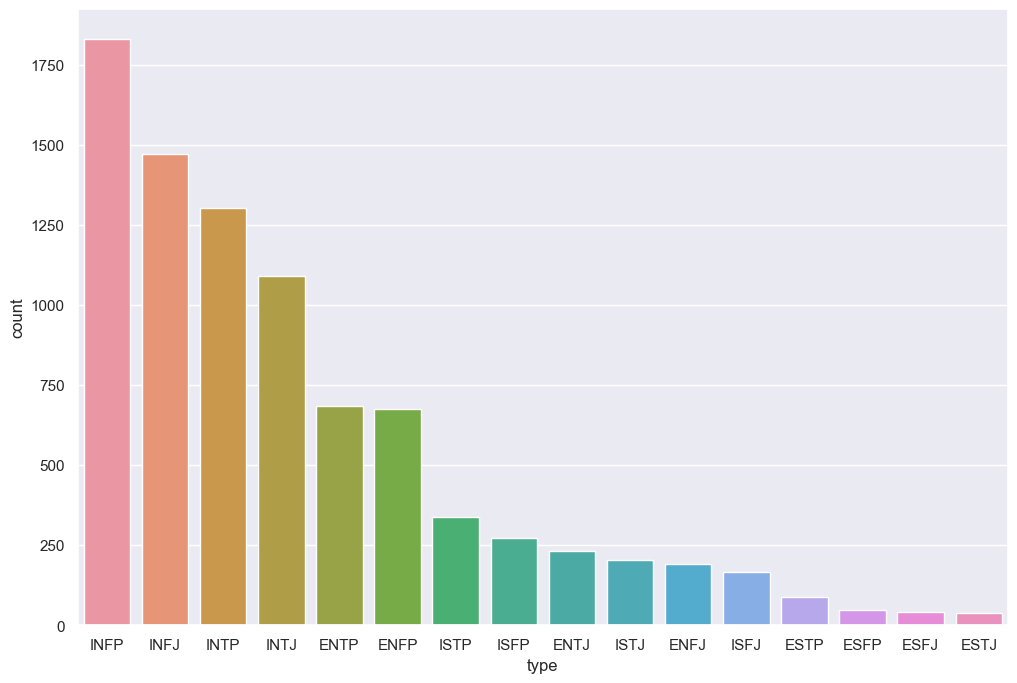

In [26]:
# plot the distribution of each personality type
plt.figure(figsize=(12, 8))
sns.countplot(x='type', data=df2, order=df2['type'].value_counts().index)